In [2]:
import pandas as pd
import os 
from os import listdir
from os.path import isfile, join 
import glob
import re
import matplotlib 
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
path=os.getcwd()
print(path)
from google.colab import drive
drive.mount('/content/drive')

/content
Mounted at /content/drive


In [4]:
migrantdata = pd.ExcelFile('/content/drive/My Drive/UN_MigrantStockTotal_2015.xlsx')

In [5]:
table1 = pd.read_excel(migrantdata, 'Table 1', header=[0,1], skiprows = 14)
table1.head()

Sort\norder Major area, region, country or area of destination  \
  Unnamed: 0_level_1                                 Unnamed: 1_level_1   
0                  1                                              WORLD   
1                  2                                  Developed regions   
2                  3                                 Developing regions   
3                  4                          Least developed countries   
4                  5  Less developed regions excluding least develop...   

               Notes       Country code   Type of data (a)  \
  Unnamed: 2_level_1 Unnamed: 3_level_1 Unnamed: 4_level_1   
0                NaN                900                NaN   
1                (b)                901                NaN   
2                (c)                902                NaN   
3                (d)                941                NaN   
4                NaN                934                NaN   

  International migrant stock at mid-year (both sexes)                        \
                                                  1990       1995       2000   
0                                          152563212    160801752  172703309   
1                                           82378628     92306854  103375363   
2                                           70184584     68494898   69327946   
3                                           11075966     11711703   10077824   
4                                           59105261     56778501   59244124   

                         ... International migrant stock at mid-year (male)  \
        2005       2010  ...                                           2000   
0  191269100  221714243  ...                                       87884839   
1  117181109  132560325  ...                                       50536796   
2   74087991   89153918  ...                                       37348043   
3    9809634   10018128  ...                                        5361902   
4   64272611   79130668  ...                                       31986141   

                                   \
       2005       2010       2015   
0  97866674  114613714  126115435   
1  57217777   64081077   67618619   
2  40648897   50532637   58496816   
3   5383009    5462714    6463217   
4  35265888   45069923   52033599   

  International migrant stock at mid-year (female)                      \
                                              1990      1995      2000   
0                                         74815702  79064275  84818470   
1                                         42115231  47214055  52838567   
2                                         32700471  31850220  31979903   
3                                          5236216   5573685   4721920   
4                                         27464255  26276535  27257983   

                                   
       2005       2010       2015  
0  93402426  107100529  117584801  
1  59963332   68479248   72863336  
2  33439094   38621281   44721465  
3   4432371    4560536    5493028  
4  29006723   34060745   39228437  

[5 rows x 23 columns]

In [6]:
table1 = table1.rename(columns={
    'Sort\norder':'sortorder',
    'Major area, region, country or area of destination': 'majorarea',
    'Notes':'notes',
    'Country code':"countrycode",
    'Type of data (a)':"datatype",
})
#rename columns

In [7]:
table1.head()

sortorder                                          majorarea  \
  Unnamed: 0_level_1                                 Unnamed: 1_level_1   
0                  1                                              WORLD   
1                  2                                  Developed regions   
2                  3                                 Developing regions   
3                  4                          Least developed countries   
4                  5  Less developed regions excluding least develop...   

               notes        countrycode           datatype  \
  Unnamed: 2_level_1 Unnamed: 3_level_1 Unnamed: 4_level_1   
0                NaN                900                NaN   
1                (b)                901                NaN   
2                (c)                902                NaN   
3                (d)                941                NaN   
4                NaN                934                NaN   

  International migrant stock at mid-year (both sexes)                        \
                                                  1990       1995       2000   
0                                          152563212    160801752  172703309   
1                                           82378628     92306854  103375363   
2                                           70184584     68494898   69327946   
3                                           11075966     11711703   10077824   
4                                           59105261     56778501   59244124   

                         ... International migrant stock at mid-year (male)  \
        2005       2010  ...                                           2000   
0  191269100  221714243  ...                                       87884839   
1  117181109  132560325  ...                                       50536796   
2   74087991   89153918  ...                                       37348043   
3    9809634   10018128  ...                                        5361902   
4   64272611   79130668  ...                                       31986141   

                                   \
       2005       2010       2015   
0  97866674  114613714  126115435   
1  57217777   64081077   67618619   
2  40648897   50532637   58496816   
3   5383009    5462714    6463217   
4  35265888   45069923   52033599   

  International migrant stock at mid-year (female)                      \
                                              1990      1995      2000   
0                                         74815702  79064275  84818470   
1                                         42115231  47214055  52838567   
2                                         32700471  31850220  31979903   
3                                          5236216   5573685   4721920   
4                                         27464255  26276535  27257983   

                                   
       2005       2010       2015  
0  93402426  107100529  117584801  
1  59963332   68479248   72863336  
2  33439094   38621281   44721465  
3   4432371    4560536    5493028  
4  29006723   34060745   39228437  

[5 rows x 23 columns]

In [8]:
table1.columns = table1.columns.map('{0[0]}{0[1]}'.format)
print(table1.columns)
#merge headers

Index(['sortorderUnnamed: 0_level_1', 'majorareaUnnamed: 1_level_1',
       'notesUnnamed: 2_level_1', 'countrycodeUnnamed: 3_level_1',
       'datatypeUnnamed: 4_level_1',
       'International migrant stock at mid-year (both sexes)1990',
       'International migrant stock at mid-year (both sexes)1995',
       'International migrant stock at mid-year (both sexes)2000',
       'International migrant stock at mid-year (both sexes)2005',
       'International migrant stock at mid-year (both sexes)2010',
       'International migrant stock at mid-year (both sexes)2015',
       'International migrant stock at mid-year (male)1990',
       'International migrant stock at mid-year (male)1995',
       'International migrant stock at mid-year (male)2000',
       'International migrant stock at mid-year (male)2005',
       'International migrant stock at mid-year (male)2010',
       'International migrant stock at mid-year (male)2015',
       'International migrant stock at mid-year (female)199

In [9]:
#make new data from table 1, only take sort order then both sexes data
table1 = table1.rename (columns={
    'sortorderUnnamed: 0_level_1':'sortorder',
    'majorareaUnnamed: 1_level_1':'majorarea',
    'notesUnnamed: 2_level_1':'notes',
    'countrycodeUnnamed: 3_level_1':'countrycode',
    'datatypeUnnamed: 4_level_1':'datatype',
    'International migrant stock at mid-year (both sexes)1990':'imsamybs1990',
       'International migrant stock at mid-year (both sexes)1995':'imsamybs1995',
       'International migrant stock at mid-year (both sexes)2000':'imsamybs2000',
       'International migrant stock at mid-year (both sexes)2005':'imsamybs2005',
       'International migrant stock at mid-year (both sexes)2010':'imsamybs2010',
       'International migrant stock at mid-year (both sexes)2015':'imsamybs2015',
       'International migrant stock at mid-year (male)1990':'imsamym1990',
       'International migrant stock at mid-year (male)1995':'imsamym1995',
       'International migrant stock at mid-year (male)2000':'imsamym2000',
       'International migrant stock at mid-year (male)2005':'imsamym2005',
       'International migrant stock at mid-year (male)2010':'imsamym2010',
       'International migrant stock at mid-year (male)2015':'imsamym2015',
       'International migrant stock at mid-year (female)1990':'imsamyf1990',
       'International migrant stock at mid-year (female)1995':'imsamyf1995',
       'International migrant stock at mid-year (female)2000':'imsamyf2000',
       'International migrant stock at mid-year (female)2005':'imsamyf2005',
       'International migrant stock at mid-year (female)2010':'imsamyf2010',
       'International migrant stock at mid-year (female)2015':'imsamyf2015',
   
    




    
})

[Text(0.5, 1.0, 'Migrant Stocks')]

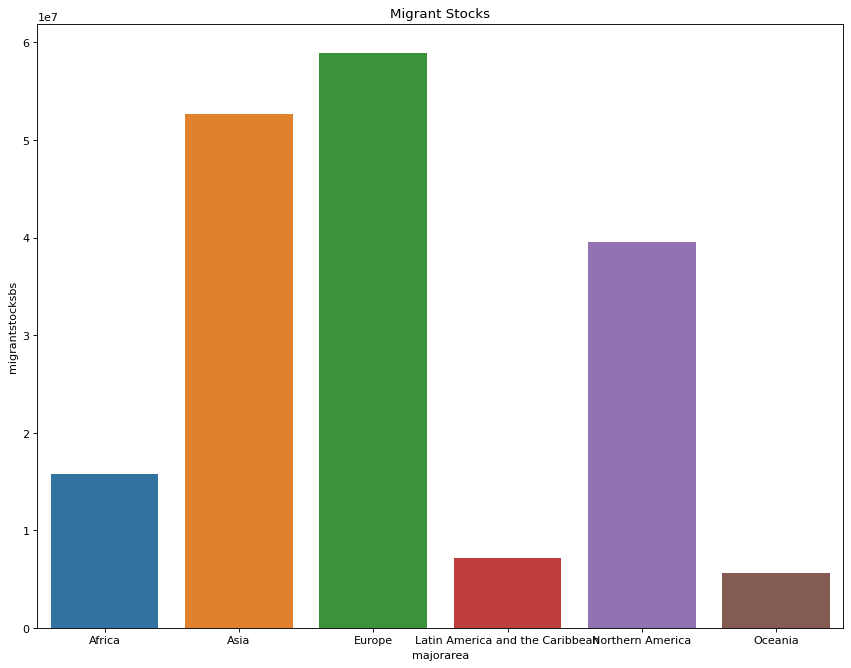

In [10]:
table1
table1 = table1.loc[table1['majorarea'].isin(['Africa', 'Asia', 'Europe', 'Northern America', 'Latin America and the Caribbean', 'Oceania'])]
table2 = table1[['majorarea', 'imsamybs1990','imsamybs1995','imsamybs2000','imsamybs2005','imsamybs2010','imsamybs2015']]
table2 = table2.melt(id_vars=['majorarea'], value_vars=['imsamybs1990', 'imsamybs1995', 'imsamybs2000', 'imsamybs2005', 'imsamybs2010'], value_name='migrantstocksbs') 
plt.figure(figsize=(13,10), dpi= 80)
sns.barplot(data=table2,x='majorarea',y='migrantstocksbs',ci=None).set(title='Migrant Stocks')








[Text(0.5, 1.0, 'Migrant Stocks')]

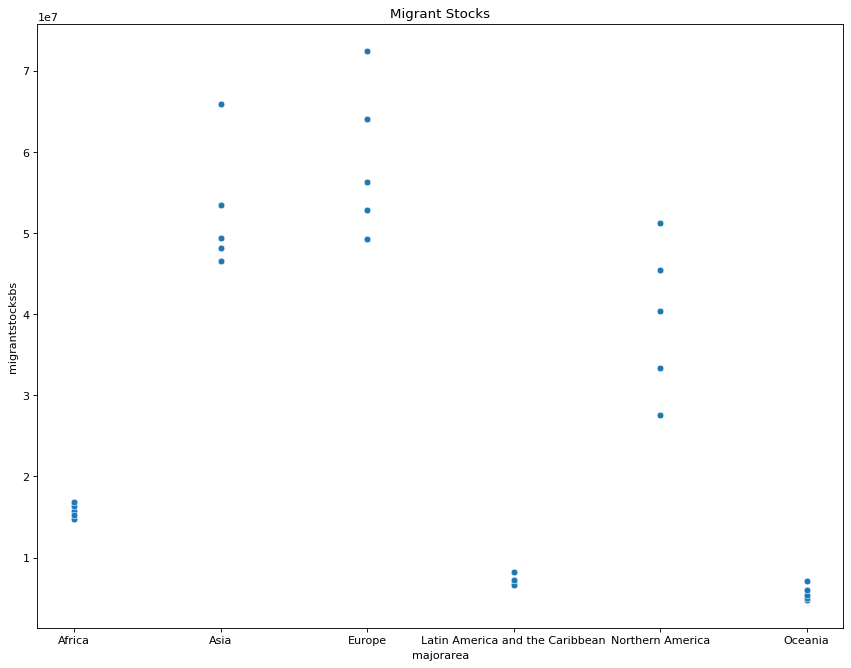

In [11]:
plt.figure(figsize=(13,10), dpi= 80)
sns.scatterplot(data=table2,x='majorarea',y='migrantstocksbs',ci=None).set(title='Migrant Stocks')



In [45]:
plt.figure(figsize=(13,10), dpi= 80)
sns.FacetGrid(data=table2,x='majorarea',y='migrantstocksbs',ci=None).set(title='Migrant Stocks')

TypeError: ignored

<Figure size 1040x800 with 0 Axes>

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1040x800 with 0 Axes>

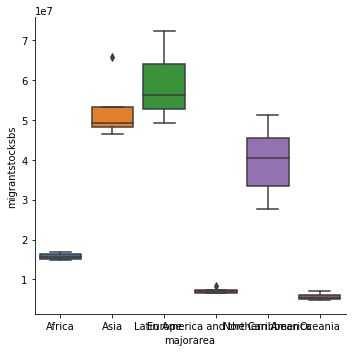

In [50]:

jaja = plt.figure(figsize=(13,10), dpi= 80)
sns.factorplot("majorarea", "migrantstocksbs", data=table2, kind="box")


[Text(0.5, 1.0, 'Migrant Stocks')]

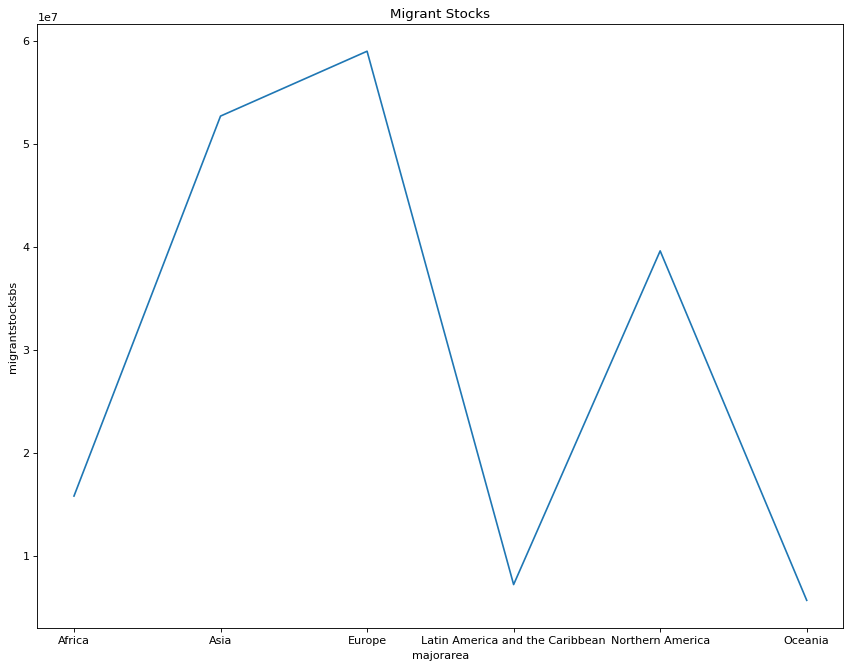

In [16]:
plt.figure(figsize=(13,10), dpi= 80)
sns.lineplot(data=table2,x='majorarea',y='migrantstocksbs',ci=None).set(title='Migrant Stocks')

[Text(0.5, 1.0, 'Migrant Stocks')]

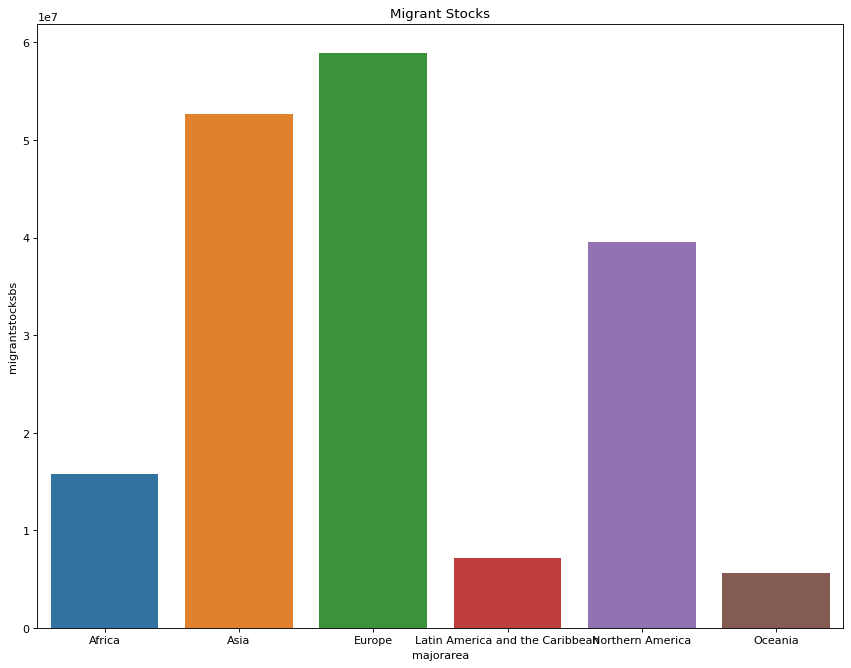

In [18]:
plt.figure(figsize=(13,10), dpi= 80)
sns.barplot(data=table2,x='majorarea',y='migrantstocksbs',ci=None).set(title='Migrant Stocks')

In [20]:
tabletwo = pd.read_excel(migrantdata, 'Table 2', header=[0,1], skiprows=14)
tabletwo.head()

Sort\norder Major area, region, country or area of destination  \
  Unnamed: 0_level_1                                 Unnamed: 1_level_1   
0                  1                                              WORLD   
1                  2                                  Developed regions   
2                  3                                 Developing regions   
3                  4                          Least developed countries   
4                  5  Less developed regions excluding least develop...   

               Notes       Country code  \
  Unnamed: 2_level_1 Unnamed: 3_level_1   
0                NaN                900   
1                (b)                901   
2                (c)                902   
3                (d)                941   
4                NaN                934   

  Total population of both sexes at mid-year (thousands)               \
                                                    1990         1995   
0                                        5309667.699      5735123.084   
1                                        1144463.062      1169761.211   
2                                        4165204.637      4565361.873   
3                                         510057.629       585189.354   
4                                        3655147.008      3980172.519   

                                                       ...  \
          2000         2005         2010         2015  ...   
0  6126622.121  6519635.850  6929725.043  7349472.099  ...   
1  1188811.731  1208919.509  1233375.711  1251351.086  ...   
2  4937810.390  5310716.341  5696349.332  6098121.013  ...   
3   664386.087   752804.951   847254.847   954157.804  ...   
4  4273424.303  4557911.390  4849094.485  5143963.209  ...   

  Total male population at mid-year (thousands)                            \
                                           2000         2005         2010   
0                                   3084537.662  3285082.249  3493956.904   
1                                    578010.218   587962.213   599955.476   
2                                   2506527.444  2697120.036  2894001.428   
3                                    331482.475   375757.715   422397.532   
4                                   2175044.969  2321362.321  2471603.896   

               Total female population at mid-year (thousands)               \
          2015                                            1990         1995   
0  3707205.753                                     2639243.998  2848487.191   
1   609297.148                                      589207.436   601492.755   
2  3097908.605                                     2050036.562  2246994.436   
3   476031.179                                      256015.073   293162.612   
4  2621877.426                                     1794021.489  1953831.824   

                                                       
          2000         2005         2010         2015  
0  3042084.459  3234553.601  3435768.139  3642266.346  
1   610801.513   620957.296   633420.235   642053.938  
2  2431282.946  2613596.305  2802347.904  3000212.408  
3   332903.612   377047.236   424857.315   478126.625  
4  2098379.334  2236549.069  2377490.589  2522085.783  

[5 rows x 22 columns]

In [21]:
tabletwo.columns = tabletwo.columns.map('{0[0]}{0[1]}'.format)
print(tabletwo.columns)

Index(['Sort\norderUnnamed: 0_level_1',
       'Major area, region, country or area of destinationUnnamed: 1_level_1',
       'NotesUnnamed: 2_level_1', 'Country codeUnnamed: 3_level_1',
       'Total population of both sexes at mid-year (thousands)1990',
       'Total population of both sexes at mid-year (thousands)1995',
       'Total population of both sexes at mid-year (thousands)2000',
       'Total population of both sexes at mid-year (thousands)2005',
       'Total population of both sexes at mid-year (thousands)2010',
       'Total population of both sexes at mid-year (thousands)2015',
       'Total male population at mid-year (thousands)1990',
       'Total male population at mid-year (thousands)1995',
       'Total male population at mid-year (thousands)2000',
       'Total male population at mid-year (thousands)2005',
       'Total male population at mid-year (thousands)2010',
       'Total male population at mid-year (thousands)2015',
       'Total female population at mid-

In [22]:
tabletwo = tabletwo.rename (columns={
    'Sort\norderUnnamed: 0_level_1':'sortorder',
       'Major area, region, country or area of destinationUnnamed: 1_level_1':'majorarea',
       'NotesUnnamed: 2_level_1':'notes', 
       'Country codeUnnamed: 3_level_1':'countrycode',
       'Total population of both sexes at mid-year (thousands)1990':'tpobsamy1990',
       'Total population of both sexes at mid-year (thousands)1995':'tpobsamy1995',
       'Total population of both sexes at mid-year (thousands)2000':'tpobsamy2000',
       'Total population of both sexes at mid-year (thousands)2005':'tpobsamy2005',
       'Total population of both sexes at mid-year (thousands)2010':'tpobsamy2010',
       'Total population of both sexes at mid-year (thousands)2015':'tpobsamy2015',
       'Total male population at mid-year (thousands)1990':'tmpamy1990',
       'Total male population at mid-year (thousands)1995':'tmpamy1995',
       'Total male population at mid-year (thousands)2000':'tmpamy2000',
       'Total male population at mid-year (thousands)2005':'tmpamy2005',
       'Total male population at mid-year (thousands)2010':'tmpamy2010',
       'Total male population at mid-year (thousands)2015':'tmpamy2015',
       'Total female population at mid-year (thousands)1990':'tfpamy1990',
       'Total female population at mid-year (thousands)1995':'tfpamy1995',
       'Total female population at mid-year (thousands)2000':'tfpamy2000',
       'Total female population at mid-year (thousands)2005':'tfpamy2005',
       'Total female population at mid-year (thousands)2010':'tfpamy2010',
       'Total female population at mid-year (thousands)2015':'tfpamy2015',})
print(tabletwo.columns)

Index(['sortorder', 'majorarea', 'notes', 'countrycode', 'tpobsamy1990',
       'tpobsamy1995', 'tpobsamy2000', 'tpobsamy2005', 'tpobsamy2010',
       'tpobsamy2015', 'tmpamy1990', 'tmpamy1995', 'tmpamy2000', 'tmpamy2005',
       'tmpamy2010', 'tmpamy2015', 'tfpamy1990', 'tfpamy1995', 'tfpamy2000',
       'tfpamy2005', 'tfpamy2010', 'tfpamy2015'],
      dtype='object')


[Text(0.5, 1.0, 'Total Populations')]

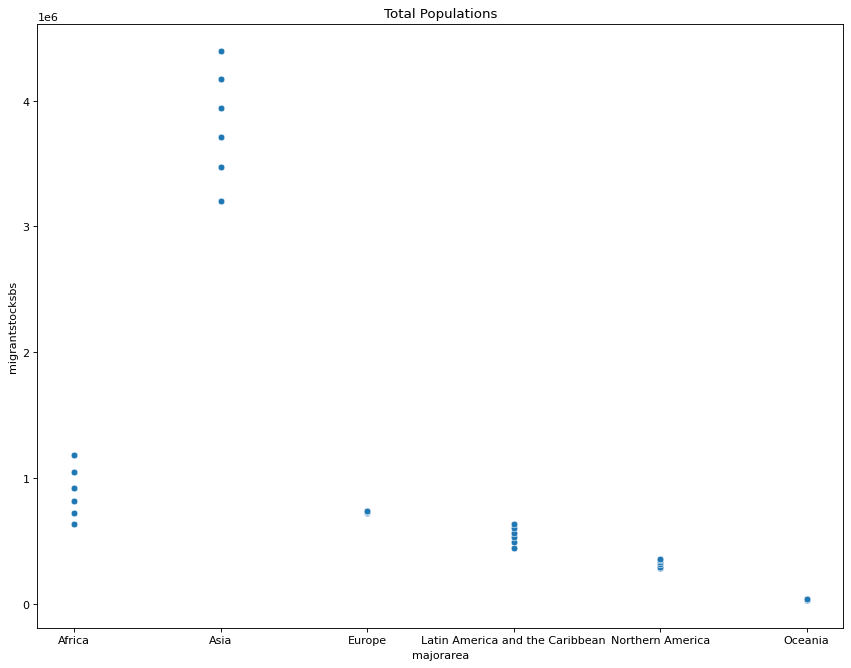

In [23]:
tabletwo
tabletwo = tabletwo.loc[tabletwo['majorarea'].isin(['Africa', 'Asia', 'Europe', 'Northern America', 'Latin America and the Caribbean', 'Oceania'])]
tablethree = tabletwo[['majorarea', 'tpobsamy1990','tpobsamy1995','tpobsamy2000','tpobsamy2005','tpobsamy2010','tpobsamy2015']]
tablethree = tablethree.melt(id_vars=['majorarea'], value_vars=['tpobsamy1990','tpobsamy1995','tpobsamy2000','tpobsamy2005','tpobsamy2010','tpobsamy2015'], value_name='migrantstocksbs') 
plt.figure(figsize=(13,10), dpi= 80)
sns.scatterplot(data=tablethree,x='majorarea',y='migrantstocksbs',ci=None).set(title='Total Populations')

In [27]:
table5 = pd.read_excel(migrantdata, 'Table 3', header=[0,1], skiprows = 14)
table5.head()

Sort\norder Major area, region, country or area of destination  \
  Unnamed: 0_level_1                                 Unnamed: 1_level_1   
0                  1                                              WORLD   
1                  2                                  Developed regions   
2                  3                                 Developing regions   
3                  4                          Least developed countries   
4                  5  Less developed regions excluding least develop...   

               Notes       Country code   Type of data (a)  \
  Unnamed: 2_level_1 Unnamed: 3_level_1 Unnamed: 4_level_1   
0                NaN                900                NaN   
1                (b)                901                NaN   
2                (c)                902                NaN   
3                (d)                941                NaN   
4                NaN                934                NaN   

  International migrant stock as a percentage of the total population (both sexes)  \
                                                                              1990   
0                                            2.87331                                 
1                                           7.198015                                 
2                                           1.685021                                 
3                                           2.171513                                 
4                                           1.617042                                 

                                            ...  \
       1995      2000      2005       2010  ...   
0  2.803806  2.818899  2.933739   3.199467  ...   
1  7.891085  8.695688  9.693045  10.747765  ...   
2  1.500317  1.404022  1.395066   1.565106  ...   
3  2.001353  1.516863  1.303078   1.182422  ...   
4  1.426534  1.386338  1.410133   1.631865  ...   

  International migrant stock as a percentage of the total population (male)  \
                                                                        2000   
0                                           2.849206                           
1                                           8.743236                           
2                                           1.490031                           
3                                           1.617552                           
4                                           1.470597                           

                                   \
       2005       2010       2015   
0  2.979124   3.280341     3.4019   
1   9.73154  10.680972  11.097807   
2  1.507122   1.746117   1.888268   
3  1.432574   1.293264    1.35773   
4  1.519189   1.823509   1.984593   

  International migrant stock as a percentage of the total population (female)  \
                                                                          1990   
0                                            2.83474                             
1                                           7.147777                             
2                                           1.595116                             
3                                           2.045276                             
4                                           1.530877                             

                                                       
       1995      2000      2005       2010       2015  
0  2.775658  2.788169  2.887645   3.117222   3.228342  
1   7.84948  8.650694  9.656595  10.811029  11.348476  
2  1.417459  1.315351  1.279428   1.378176    1.49061  
3  1.901226  1.418405  1.175548   1.073428   1.148865  
4  1.344872  1.299002  1.296941   1.432634   1.555397  

[5 rows x 23 columns]

In [28]:
table5.columns = table5.columns.map('{0[0]}{0[1]}'.format)
print(table5.columns)

Index(['Sort\norderUnnamed: 0_level_1',
       'Major area, region, country or area of destinationUnnamed: 1_level_1',
       'NotesUnnamed: 2_level_1', 'Country codeUnnamed: 3_level_1',
       'Type of data (a)Unnamed: 4_level_1',
       'International migrant stock as a percentage of the total population (both sexes)1990',
       'International migrant stock as a percentage of the total population (both sexes)1995',
       'International migrant stock as a percentage of the total population (both sexes)2000',
       'International migrant stock as a percentage of the total population (both sexes)2005',
       'International migrant stock as a percentage of the total population (both sexes)2010',
       'International migrant stock as a percentage of the total population (both sexes)2015',
       'International migrant stock as a percentage of the total population (male)1990',
       'International migrant stock as a percentage of the total population (male)1995',
       'Internationa

In [29]:
table5 = table5.rename (columns={
   'Sort\norderUnnamed: 0_level_1':'sortorder',
       'Major area, region, country or area of destinationUnnamed: 1_level_1':'majorarea',
       'NotesUnnamed: 2_level_1':'notes',
       'Country codeUnnamed: 3_level_1':'countrycode',
       'Type of data (a)Unnamed: 4_level_1':'datatype',
       'International migrant stock as a percentage of the total population (both sexes)1990':'imsaapottpbs1990',
       'International migrant stock as a percentage of the total population (both sexes)1995':'imsaapottpbs1995',
       'International migrant stock as a percentage of the total population (both sexes)2000':'imsaapottpbs2000',
       'International migrant stock as a percentage of the total population (both sexes)2005':'imsaapottpbs2005',
       'International migrant stock as a percentage of the total population (both sexes)2010':'imsaapottpbs2010',
       'International migrant stock as a percentage of the total population (both sexes)2015':'imsaapottpbs2015',
       'International migrant stock as a percentage of the total population (male)1990':'imsaapottpm1990',
       'International migrant stock as a percentage of the total population (male)1995':'imsaapottpm1995',
       'International migrant stock as a percentage of the total population (male)2000':'imsaapottpm2000',
       'International migrant stock as a percentage of the total population (male)2005':'imsaapottpm2005',
       'International migrant stock as a percentage of the total population (male)2010':'imsaapottpm2010',
       'International migrant stock as a percentage of the total population (male)2015':'imsaapottpm2015',
       'International migrant stock as a percentage of the total population (female)1990':'imsaapottpf1990',
       'International migrant stock as a percentage of the total population (female)1995':'imsaapottpf1995',
       'International migrant stock as a percentage of the total population (female)2000':'imsaapottpf2000',
       'International migrant stock as a percentage of the total population (female)2005':'imsaapottpf2005',
       'International migrant stock as a percentage of the total population (female)2010':'imsaapottpf2010',
       'International migrant stock as a percentage of the total population (female)2015':'imsaapottpf2015', 

})


[Text(0.5, 1.0, 'Total Populations as %')]

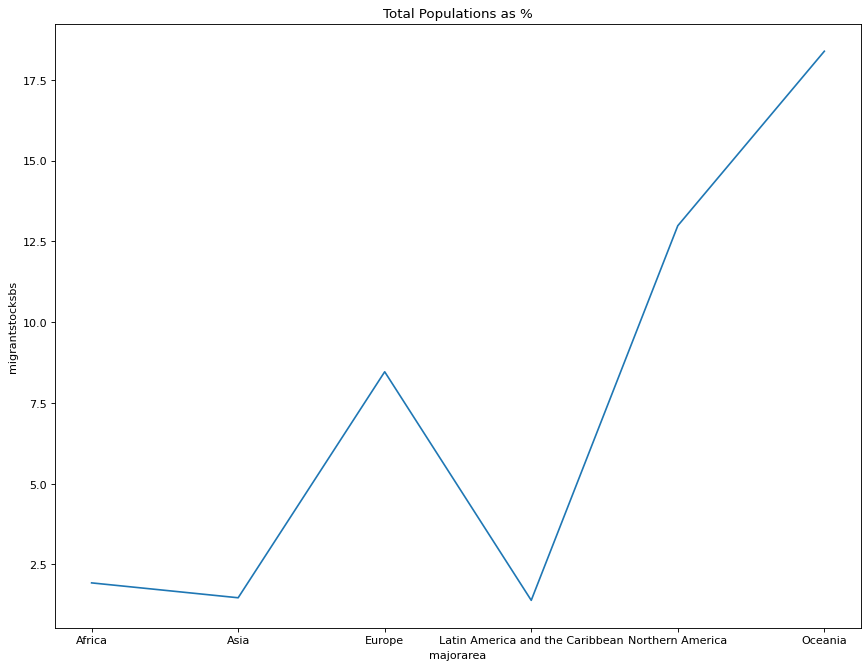

In [34]:
table5
table5 = table5.loc[table5['majorarea'].isin(['Africa', 'Asia', 'Europe', 'Northern America', 'Latin America and the Caribbean', 'Oceania'])]
table6 = table5[['majorarea', 'imsaapottpbs1990','imsaapottpbs1995','imsaapottpbs2000','imsaapottpbs2005','imsaapottpbs2010','imsaapottpbs2015']]
table6 = table6.melt(id_vars=['majorarea'], value_vars=['imsaapottpbs1990','imsaapottpbs1995','imsaapottpbs2000','imsaapottpbs2005','imsaapottpbs2010','imsaapottpbs2015'], value_name='migrantstocksbs') 
plt.figure(figsize=(13,10), dpi= 80)
sns.lineplot(data=table6,x='majorarea',y='migrantstocksbs',ci=None).set(title='Total Populations as %')

In [51]:
four = pd.read_excel(migrantdata, 'Table 4', header=[0,1], skiprows = 14)
four.head()

Sort\norder Major area, region, country or area of destination  \
  Unnamed: 0_level_1                                 Unnamed: 1_level_1   
0                  1                                              WORLD   
1                  2                                  Developed regions   
2                  3                                 Developing regions   
3                  4                          Least developed countries   
4                  5  Less developed regions excluding least develop...   

               Notes       Country code   Type of data (a)  \
  Unnamed: 2_level_1 Unnamed: 3_level_1 Unnamed: 4_level_1   
0                NaN                900                NaN   
1                (b)                901                NaN   
2                (c)                902                NaN   
3                (d)                941                NaN   
4                NaN                934                NaN   

  Female migrants as a percentage of the international migrant stock  \
                                                                1990   
0                                           49.03915                   
1                                          51.123977                   
2                                          46.592099                   
3                                          47.261155                   
4                                          46.466684                   

                                                          
        1995       2000       2005       2010       2015  
0   49.16879  49.112244  48.832993  48.305660  48.249769  
1  51.149024  51.113307  51.171501  51.658932  51.866687  
2  46.500135  46.128444  45.134297  43.319780  43.327078  
3  47.571664  46.826689  45.157406  45.499573  45.942752  
4  46.279022  46.009598  45.130768  43.043672  42.984398

In [52]:
four.columns = four.columns.map('{0[0]}{0[1]}'.format)
print(four.columns)

Index(['Sort\norderUnnamed: 0_level_1',
       'Major area, region, country or area of destinationUnnamed: 1_level_1',
       'NotesUnnamed: 2_level_1', 'Country codeUnnamed: 3_level_1',
       'Type of data (a)Unnamed: 4_level_1',
       'Female migrants as a percentage of the international migrant stock1990',
       'Female migrants as a percentage of the international migrant stock1995',
       'Female migrants as a percentage of the international migrant stock2000',
       'Female migrants as a percentage of the international migrant stock2005',
       'Female migrants as a percentage of the international migrant stock2010',
       'Female migrants as a percentage of the international migrant stock2015'],
      dtype='object')


In [53]:
#rename table 4 columns
four = four.rename (columns={
   'Sort\norderUnnamed: 0_level_1':'sortorder',
       'Major area, region, country or area of destinationUnnamed: 1_level_1':'majorarea',
       'NotesUnnamed: 2_level_1':'notes',
       'Country codeUnnamed: 3_level_1':'countrycode',
       'Type of data (a)Unnamed: 4_level_1':'datatype',
       'Female migrants as a percentage of the international migrant stock1990':'fmaapotims1990',
       'Female migrants as a percentage of the international migrant stock1995':'fmaapotims1995',
       'Female migrants as a percentage of the international migrant stock2000':'fmaapotims2000',
       'Female migrants as a percentage of the international migrant stock2005':'fmaapotims2005',
       'Female migrants as a percentage of the international migrant stock2010':'fmaapotims2010',
       'Female migrants as a percentage of the international migrant stock2015':'fmaapotims2015',
})

[Text(0.5, 1.0, 'Female Migrants as %')]

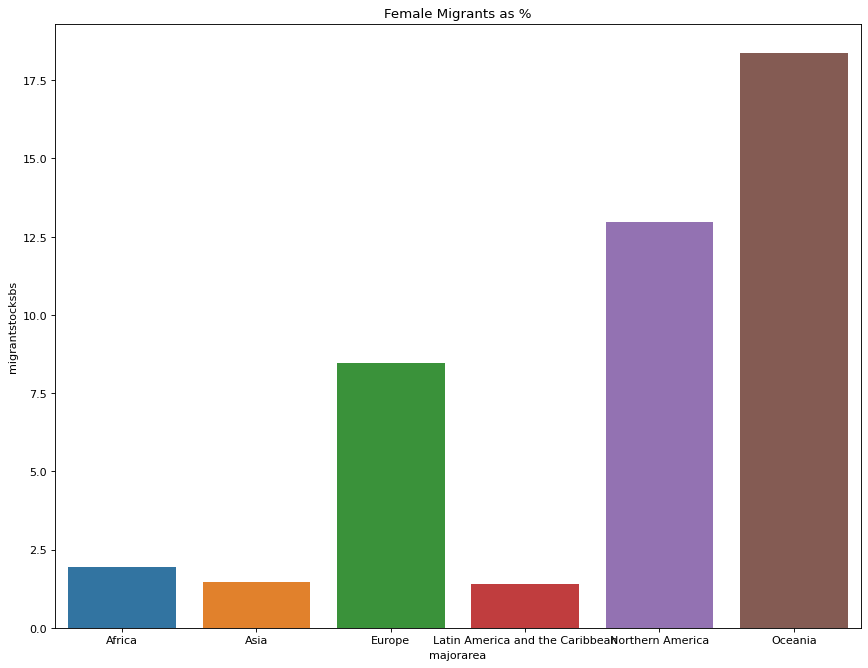

In [86]:
four
four = four.loc[four['majorarea'].isin(['Africa', 'Asia', 'Europe', 'Northern America', 'Latin America and the Caribbean', 'Oceania'])]
five = four[['majorarea', 'fmaapotims1990','fmaapotims1995','fmaapotims2000','fmaapotims2005','fmaapotims2010','fmaapotims2015']]
five = five.melt(id_vars=['majorarea'], value_vars=['fmaapotims1990','fmaapotims1995','fmaapotims2000','fmaapotims2005','fmaapotims2010','fmaapotims2015'], value_name='migrantstocksbs') 
plt.figure(figsize=(13,10), dpi= 80)
sns.barplot(data=table6,x='majorarea',y='migrantstocksbs',ci=None).set(title='Female Migrants as %')




In [87]:
ten = pd.read_excel(migrantdata, 'Table 5', header=[0,1], skiprows = 14)
ten.head()

Sort\norder Major area, region, country or area of destination  \
  Unnamed: 0_level_1                                 Unnamed: 1_level_1   
0                  1                                              WORLD   
1                  2                                  Developed regions   
2                  3                                 Developing regions   
3                  4                          Least developed countries   
4                  5  Less developed regions excluding least develop...   

               Notes       Country code   Type of data (a)  \
  Unnamed: 2_level_1 Unnamed: 3_level_1 Unnamed: 4_level_1   
0                NaN                900                NaN   
1                (b)                901                NaN   
2                (c)                902                NaN   
3                (d)                941                NaN   
4                NaN                934                NaN   

  Annual rate of change of the migrant stock (both sexes)                      \
                                                1990-1995 1995-2000 2000-2005   
0                                           1.051865       1.428058  2.042124   
1                                           2.275847       2.264965   2.50708   
2                                          -0.487389       0.241777  1.328107   
3                                           1.118175      -3.001139 -0.539636   
4                                          -0.803244       0.850177   1.62934   

                      Annual rate of change of the migrant stock (male)  \
  2005-2010 2010-2015                                         1990-1995   
0   2.95416  1.890991                                          1.000922   
1  2.466343  1.160824                                          2.265595   
2  3.702217  2.929634                                          -0.45298   
3  0.419137  3.526927                                          1.000073   
4  4.159339  2.852687                                         -0.733256   

                                           \
  1995-2000 2000-2005 2005-2010 2010-2015   
0  1.450294  2.151575  3.159228  1.912603   
1  2.279583  2.483259  2.265689  1.074685   
2  0.380246  1.693824  4.352954  2.927058   
3 -2.718952  0.078575  0.293964  3.363629   
4  0.950231  1.952269   4.90598  2.873490   

  Annual rate of change of the migrant stock (female)                      \
                                            1990-1995 1995-2000 2000-2005   
0                                           1.104667   1.405044   1.92808   
1                                           2.285643   2.250995  2.529838   
2                                          -0.526904   0.081268   0.89236   
3                                           1.249146  -3.316818 -1.265617   
4                                           -0.88418   0.733402  1.243624   

                       
  2005-2010 2010-2015  
0  2.737012  1.867837  
1   2.65595  1.241097  
2  2.881555  2.933003  
3   0.57011  3.720790  
4  3.212358  2.825127

In [88]:
#merga table 5 headers 
ten.columns = ten.columns.map('{0[0]}{0[1]}'.format)
print(ten.columns)

Index(['Sort\norderUnnamed: 0_level_1',
       'Major area, region, country or area of destinationUnnamed: 1_level_1',
       'NotesUnnamed: 2_level_1', 'Country codeUnnamed: 3_level_1',
       'Type of data (a)Unnamed: 4_level_1',
       'Annual rate of change of the migrant stock (both sexes)1990-1995',
       'Annual rate of change of the migrant stock (both sexes)1995-2000',
       'Annual rate of change of the migrant stock (both sexes)2000-2005',
       'Annual rate of change of the migrant stock (both sexes)2005-2010',
       'Annual rate of change of the migrant stock (both sexes)2010-2015',
       'Annual rate of change of the migrant stock (male)1990-1995',
       'Annual rate of change of the migrant stock (male)1995-2000',
       'Annual rate of change of the migrant stock (male)2000-2005',
       'Annual rate of change of the migrant stock (male)2005-2010',
       'Annual rate of change of the migrant stock (male)2010-2015',
       'Annual rate of change of the migrant sto

In [89]:
#rename table 5 columns
ten = ten.rename (columns={
   'Sort\norderUnnamed: 0_level_1':'sortorder',
       'Major area, region, country or area of destinationUnnamed: 1_level_1':'majorarea',
       'NotesUnnamed: 2_level_1':'notes',
       'Country codeUnnamed: 3_level_1':'countrycode',
       'Type of data (a)Unnamed: 4_level_1':'datatype',
       'Annual rate of change of the migrant stock (both sexes)1990-1995':'arocotmsbs1990',
       'Annual rate of change of the migrant stock (both sexes)1995-2000':'arocotmsbs1995',
       'Annual rate of change of the migrant stock (both sexes)2000-2005':'arocotmsbs2000',
       'Annual rate of change of the migrant stock (both sexes)2005-2010':'arocotmsbs2005',
       'Annual rate of change of the migrant stock (both sexes)2010-2015':'arocotmsbs2010',
       'Annual rate of change of the migrant stock (male)1990-1995':'arocotmsm1990',
       'Annual rate of change of the migrant stock (male)1995-2000':'arocotmsm1995',
       'Annual rate of change of the migrant stock (male)2000-2005':'arocotmsm2000',
       'Annual rate of change of the migrant stock (male)2005-2010':'arocotmsm2005',
       'Annual rate of change of the migrant stock (male)2010-2015':'arocotmsm2010',
       'Annual rate of change of the migrant stock (female)1990-1995':'arocotmsf1990',
       'Annual rate of change of the migrant stock (female)1995-2000':'arocotmsf1995',
       'Annual rate of change of the migrant stock (female)2000-2005':'arocotmsf2000',
       'Annual rate of change of the migrant stock (female)2005-2010':'arocotmsf2005',
       'Annual rate of change of the migrant stock (female)2010-2015':'arocotmsf2010',
})

<Figure size 1040x800 with 0 Axes>

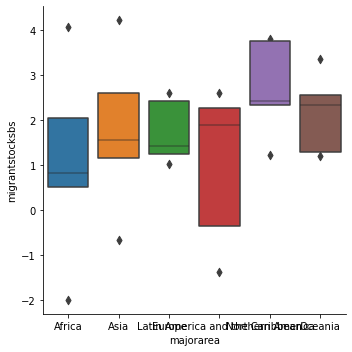

In [99]:
ten
ten = ten.loc[ten['majorarea'].isin(['Africa', 'Asia', 'Europe', 'Northern America', 'Latin America and the Caribbean', 'Oceania'])]
ben = ten[['majorarea', 'arocotmsbs1990','arocotmsbs1995','arocotmsbs2000','arocotmsbs2005','arocotmsbs2010']]
ben = ben.melt(id_vars=['majorarea'], value_vars=['arocotmsbs1990','arocotmsbs1995','arocotmsbs2000','arocotmsbs2005','arocotmsbs2010'], value_name='migrantstocksbs') 
plt.figure(figsize=(13,10), dpi= 80)
sns.catplot(data=ben, x="majorarea", y="migrantstocksbs", kind="boxen")